<a href="https://colab.research.google.com/github/ChrissRojas/KNN-Gamma-Hadron/blob/main/K_Nearest_Neighbours_Classification_of_Gamma_Hadron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Gamma or Hadron using K-nearest neighbours
We will be using the



In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Details about the Dataset and Reference.


In [ ]:
with open('magic04.names', 'r') as cols:
  print(cols.read())

1. Title of Database: MAGIC gamma telescope data 2004

2. Sources:

   (a) Original owner of the database:

       R. K. Bock
       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
       http://wwwmagic.mppmu.mpg.de
       rkb@mail.cern.ch

   (b) Donor:

       P. Savicky
       Institute of Computer Science, AS of CR
       Czech Republic
       savicky@cs.cas.cz

   (c) Date received: May 2007

3. Past Usage:

   (a) Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T.,
       Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S.,
       Vaicilius, A., Wittek W. (2004).
       Methods for multidimensional event classification: a case study
       using images from a Cherenkov gamma-ray telescope.
       Nucl.Instr.Meth. A, 516, pp. 511-528.

   (b) P. Savicky, E. Kotrc.
       Experimental Study of Leaf Confidences for Random Forest.
       Proceedings of COMPSTAT 2004, In: Computational Statistics.
       (Ed.: Antoch J.) - Heidelberg, Physi

# Preparing Columns
    1.  fLength:  continuous  # major axis of ellipse [mm]
    2.  fWidth:   continuous  # minor axis of ellipse [mm]
    3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
    4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
    5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
    6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
    7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm]
    8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
    9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
   10.  fDist:    continuous  # distance from origin to center of ellipse [mm]
   11.  class:    g,h         # gamma (signal), hadron (background)


In [ ]:
cols = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist', 'class']
magic_df = pd.read_csv('magic04.data', names=cols)
magic_df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [ ]:
magic_df['class'].unique()

array(['g', 'h'], dtype=object)

# Some data insight
The 2 counts suggest I may need to oversample due to discrepancy in totals between hadrons and gamma.

In [ ]:
magic_df[magic_df['class']=='g']['class'].count()

12332

In [ ]:
magic_df[magic_df['class']=='h']['class'].count()

6688

<Axes: xlabel='fLength', ylabel='Count'>

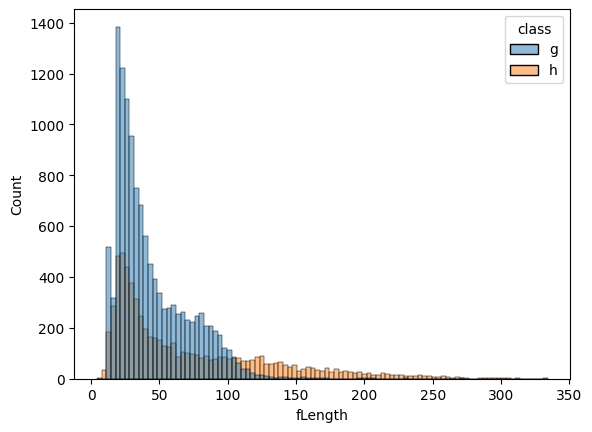

In [ ]:
sns.histplot(data=magic_df,x='fLength', hue='class')

In [ ]:
magic_df['class'] = (magic_df['class']=='g').astype(int)

In [ ]:
magic_df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


# Split into X and Y

In [ ]:
train, valid, test = np.split(magic_df.sample(frac=1), [int(0.6*len(magic_df)),int(0.8*len(magic_df))])

In [ ]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
1590,78.4084,22.6877,2.9201,0.3846,0.2710,-14.5098,-32.7912,-15.9201,5.6934,327.2140,1
3906,77.4047,34.7620,3.5437,0.2002,0.1185,-30.7767,58.2055,10.5048,4.6324,299.4920,1
12135,72.2077,27.4244,3.4805,0.1597,0.0802,74.7984,61.7693,-10.2314,2.5450,254.6540,1
18721,24.4699,12.8827,2.2833,0.5573,0.3047,28.6801,10.5679,7.7900,77.8260,175.7750,0
5664,21.7439,6.3074,2.2683,0.7601,0.5040,19.7026,16.8273,6.5081,11.6322,177.3980,1
...,...,...,...,...,...,...,...,...,...,...,...
14698,68.4655,22.3665,2.9678,0.2434,0.1438,104.0690,-55.3082,15.1710,84.7105,211.5780,0
18643,71.8675,12.4783,3.0881,0.2335,0.1261,71.5889,-14.9573,-5.0996,85.2263,223.8820,0
7018,35.5176,13.2352,2.6613,0.3620,0.2148,2.2895,28.7752,-10.4155,4.5650,158.2380,1
15035,27.7947,24.8586,3.0680,0.2812,0.1535,-2.7703,23.9281,-6.2307,43.8062,242.6183,0


In [ ]:
valid

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
10613,43.2456,35.6850,3.4692,0.1599,0.0844,5.5244,37.2119,19.9618,11.8193,128.2380,1
2475,20.5294,10.1788,2.2672,0.6000,0.3649,-4.3996,15.8176,-8.6331,34.6770,130.8800,1
9696,18.0642,10.4007,2.3655,0.6293,0.3341,21.8701,10.8837,5.7515,71.9141,141.8180,1
14228,135.0778,41.7495,3.3732,0.1178,0.0817,4.7027,98.6147,-41.1138,59.6140,169.6094,0
10077,86.7474,27.1310,3.5139,0.1675,0.0853,52.2077,82.4724,11.7413,16.6240,218.0470,1
...,...,...,...,...,...,...,...,...,...,...,...
1240,22.5585,17.1438,2.5804,0.3679,0.1879,7.9509,-5.9434,-14.6321,9.3268,184.7000,1
9021,53.5082,19.9123,3.2121,0.2283,0.1230,60.3099,34.1822,8.1916,0.4870,247.3880,1
14440,36.9438,8.9018,2.6479,0.4032,0.2171,-59.2245,19.4381,-9.6450,6.8549,109.6991,0
2823,40.4385,38.4418,3.7658,0.1900,0.0954,-10.2230,34.4512,19.5913,12.9888,96.4919,1


In [ ]:
test

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
1939,88.3871,21.0030,3.0934,0.2371,0.1407,-57.0802,73.1872,4.4624,1.8504,282.0560,1
18802,26.5934,15.2959,2.2844,0.4364,0.2312,4.7208,10.5441,-13.1072,1.6630,220.3710,0
15540,44.9285,10.8788,2.5635,0.3388,0.1790,44.1868,40.4556,-5.1639,9.9880,207.4820,0
14394,120.7060,41.5505,3.3093,0.1500,0.0532,-189.9143,106.1672,17.6927,48.7276,179.7492,0
9345,31.0316,15.7052,2.8600,0.3175,0.1649,45.9593,5.9295,13.4505,8.7828,151.2220,1
...,...,...,...,...,...,...,...,...,...,...,...
114,19.6419,0.0000,2.2000,0.7950,0.5710,-0.5678,5.2697,0.0000,34.8170,182.0160,1
11652,19.1860,15.6962,2.3683,0.5182,0.2805,-5.5894,16.8472,-11.7533,43.2160,251.3050,1
557,24.8368,14.4621,2.4571,0.3909,0.2321,4.7521,17.2153,5.7761,6.4370,161.1270,1
3099,102.3370,44.0007,4.2258,0.0666,0.0372,2.7012,89.9662,-12.4656,3.2000,229.5520,1


In [ ]:
len(train[train.columns].values[0])

11

In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  if oversample:
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X,y)

  data = np.hstack((X,np.reshape(y, (-1,1))))
  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [ ]:
train

array([[ 0.58373575,  0.01925779,  0.19386433, ..., -0.83861439,
         1.77946521,  1.        ],
       [ 0.56021724,  0.67188507,  1.50963068, ..., -0.87956354,
         1.40800518,  1.        ],
       [ 0.4384421 ,  0.27528088,  1.37628168, ..., -0.96012646,
         0.80719986,  1.        ],
       ...,
       [ 1.13198397,  0.86923047,  0.52259492, ..., -0.36290955,
         1.28146061,  0.        ],
       [-0.78852033, -0.25085098, -0.48300842, ..., -0.16895878,
        -0.47097533,  0.        ],
       [-0.54347511, -0.81192138,  0.19428632, ...,  0.98435222,
         0.30266168,  0.        ]])

In [ ]:
len(train)

14738

In [ ]:
X_train

array([[ 0.58373575,  0.01925779,  0.19386433, ..., -0.77348197,
        -0.83861439,  1.77946521],
       [ 0.56021724,  0.67188507,  1.50963068, ...,  0.48893532,
        -0.87956354,  1.40800518],
       [ 0.4384421 ,  0.27528088,  1.37628168, ..., -0.50171128,
        -0.96012646,  0.80719986],
       ...,
       [ 1.13198397,  0.86923047,  0.52259492, ..., -1.12548871,
        -0.36290955,  1.28146061],
       [-0.78852033, -0.25085098, -0.48300842, ..., -0.50877702,
        -0.16895878, -0.47097533],
       [-0.54347511, -0.81192138,  0.19428632, ...,  0.31531108,
         0.98435222,  0.30266168]])

In [ ]:
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
test

array([[ 0.84181666, -0.0595428 ,  0.5645996 , ..., -0.98656815,
         1.19930351,  1.        ],
       [-0.62217176, -0.36946894, -1.13137759, ..., -0.99369158,
         0.37466838,  0.        ],
       [-0.18778486, -0.60934117, -0.54627594, ..., -0.67724259,
         0.20236195,  0.        ],
       ...,
       [-0.66378833, -0.41474876, -0.76933153, ..., -0.81222281,
        -0.41733426,  1.        ],
       [ 1.17231139,  1.18935567,  2.93854838, ..., -0.9352673 ,
         0.49740446,  1.        ],
       [-0.53611221, -0.33916112, -0.10163223, ..., -0.11124553,
        -0.84080783,  1.        ]])

In [ ]:
y_test

array([1, 0, 0, ..., 1, 1, 1])

#K-Nearest-Neighbours From Scratch!

I will be implementing the algorithm from scratch.

In [ ]:
from matplotlib.pyplot import xlabel

import math

class KNNClassifier:
  def distance_metric(self, train_row, test_row):
    dist = 0

    for i in range(len(train_row)-1):
      dist += (train_row[i] - test_row[i]) ** 2
    return math.sqrt(dist)

  def nearest_neighbours(self, train, test, k):
    distance_list = []
    n_list = []
    for tr_data in train: # for each training row
      distance = self.distance_metric(tr_data,test) # distance between 1 test row and all other training rows
      distance_list.append((tr_data, distance))
    distance_list.sort(key=lambda x:x[1] ) # sort by ascending, the first k elements are the nearest.

    for i in range(k):
      n_list.append(distance_list[i][0])
    return n_list

  def predict(self, x_train, test, k):
    counts = {}
    neighbours = self.nearest_neighbours(x_train, test, k)

    for row in neighbours:
      if row[-1] not in counts:
        counts[row[-1]] = 1
      else:
        counts[row[-1]] += 1

    current_max = None
    current_key_max = None
    for key, values in counts.items():
      if not current_key_max:
        current_key_max = key
        current_max = values
      elif values > current_max:
        current_key_max = key
        current_max = values
    return current_key_max


numpy.float64

In [ ]:
knn = KNNClassifier()
print(knn.predict(train,test[1],5))

1.0


In [ ]:
y_preds =[]
for testrow in test:
  y_preds.append(knn.predict(train,testrow,5))
y_preds

[1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0

In [ ]:
y_test

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
len(y_test)

3804

In [ ]:
len(y_preds)

3804

In [ ]:
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

print(accuracy_metric(y_test,y_preds))

79.60042060988434


#Improvements to make
- Use a queue like structure to store minimum nearest neighbours at the top Linked list?
- Maybe us a K-d Tree or Ball Tree